# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=40,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [53]:
X.shape

(100, 1)

In [54]:
X

array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

We are fitting a model with an intercept. Lets see what it is.

In [55]:
coef

array(80.88336208)

We can plot the data.

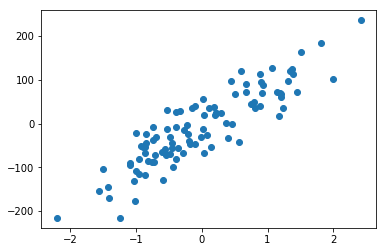

In [56]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

In [58]:
Xgrid.shape,xgrid.shape

((1000, 1), (1000,))

In [59]:
xgrid

array([-2.5       , -2.49499499, -2.48998999, -2.48498498, -2.47997998,
       -2.47497497, -2.46996997, -2.46496496, -2.45995996, -2.45495495,
       -2.44994995, -2.44494494, -2.43993994, -2.43493493, -2.42992993,
       -2.42492492, -2.41991992, -2.41491491, -2.40990991, -2.4049049 ,
       -2.3998999 , -2.39489489, -2.38988989, -2.38488488, -2.37987988,
       -2.37487487, -2.36986987, -2.36486486, -2.35985986, -2.35485485,
       -2.34984985, -2.34484484, -2.33983984, -2.33483483, -2.32982983,
       -2.32482482, -2.31981982, -2.31481481, -2.30980981, -2.3048048 ,
       -2.2997998 , -2.29479479, -2.28978979, -2.28478478, -2.27977978,
       -2.27477477, -2.26976977, -2.26476476, -2.25975976, -2.25475475,
       -2.24974975, -2.24474474, -2.23973974, -2.23473473, -2.22972973,
       -2.22472472, -2.21971972, -2.21471471, -2.20970971, -2.2047047 ,
       -2.1996997 , -2.19469469, -2.18968969, -2.18468468, -2.17967968,
       -2.17467467, -2.16966967, -2.16466466, -2.15965966, -2.15

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([84.92576075]), -7.418457737340606)

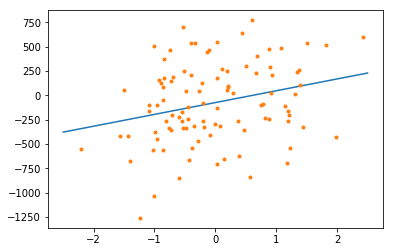

In [35]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y, lr.predict(X))

0.7884341064865041

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [64]:
sample_indices = np.random.choice(range(100), size=100)
sample_indices

array([82, 27, 47, 27, 13, 59, 95, 35, 27, 30, 83, 19, 90, 77, 51, 54, 52,
        3, 52, 21, 26, 25, 26, 38, 63, 98, 13,  4, 94, 53, 97, 64, 90,  7,
       92, 85, 23, 80, 38, 35, 22, 86, 50,  4,  1,  0, 23, 96, 55, 26, 16,
       26,  2, 76, 98,  1, 55, 68, 10, 85, 51, 82, 40,  5, 70, 16, 31, 17,
       36, 99,  7,  7,  9, 94, 61, 84, 25, 57, 16, 55, 50, 25, 68, 48, 54,
       52, 15, 35, 65, 25, 61, 79, 24, 19, 92, 89, 13, 53, 18, 56])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [66]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.7999732910236383, 0.7999732910236382)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

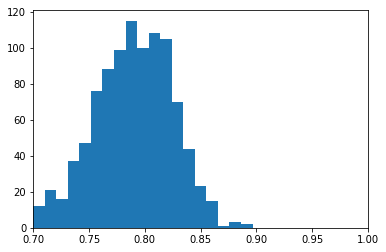

In [68]:
#your code here for bootstrap.remember resample with replacement and size=100
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here


In [0]:
# your code here


In [0]:
# your code here


In [0]:
# your code here


(0.7, 1)

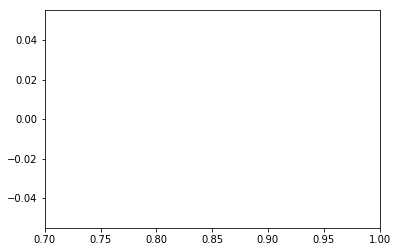

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()